In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head(4)

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  

[4 rows x 29 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [6]:
df1 = df.rename(columns={'date':'date_time', 'Appliances':'a_energy', 'lights':'l_energy',
                         'T1':'kitchen_temp', 'RH_1':'kitchen_hum', 'T2' : 'liv_temp', 
                         'RH_2' : 'liv_hum', 'T3' : 'laun_temp', 'RH_3' : 'laun_hum', 
                         'T4' : 'off_temp', 'RH_4' : 'off_hum', 'T5' : 'bath_temp', 
                         'RH_5' : 'bath_hum', 'T6' : 'out_b_temp', 'RH_6' : 'out_b_hum', 
                         'T7' : 'iron_temp', 'RH_7' : 'iron_hum', 'T8' : 'teen_temp', 
                         'RH_8' : 'teen_hum', 'T9' : 'par_temp', 'RH_9' : 'par_hum', 
                         'T_out' : 'out_temp', 'Press_mm_hg' : 'out_press', 'RH_out' : 'out_hum', 
                         'Windspeed' : 'wind', 'Visibility' : 'visibility', 
                         'Tdewpoint' : 'dew_point', 'rv1' : 'rv1', 'rv2' : 'rv2'} )

<b>The a_energy and l_energy columns are the energy consumed by the appliances and lights respectively and are both in Wh (watt-hour). The temperature columns are all in degree Celsius and humidity columns are in %. The pressure column is in mmHg, the wind speed column is in meters per second, visibility is in kilometers, and Tdewpoint is in degree Celsius.</b>

In [7]:
df1.head(2)

date_time  a_energy  l_energy  kitchen_temp  kitchen_hum  \
0  2016-01-11 17:00:00        60        30         19.89    47.596667   
1  2016-01-11 17:10:00        60        30         19.89    46.693333   

   liv_temp  liv_hum  laun_temp  laun_hum  off_temp  ...   par_temp  par_hum  \
0      19.2  44.7900      19.79     44.73      19.0  ...  17.033333    45.53   
1      19.2  44.7225      19.79     44.79      19.0  ...  17.066667    45.56   

   out_temp  out_press  out_hum      wind  visibility  dew_point        rv1  \
0  6.600000      733.5     92.0  7.000000   63.000000        5.3  13.275433   
1  6.483333      733.6     92.0  6.666667   59.166667        5.2  18.606195   

         rv2  
0  13.275433  
1  18.606195  

[2 rows x 29 columns]

In [8]:
df1.tail(2)

date_time  a_energy  l_energy  kitchen_temp  kitchen_hum  \
19733  2016-05-27 17:50:00       420        10          25.5        46.99   
19734  2016-05-27 18:00:00       430        10          25.5        46.60   

        liv_temp    liv_hum  laun_temp   laun_hum  off_temp  ...  par_temp  \
19733  25.414000  43.036000  26.890000  41.290000      24.7  ...      23.2   
19734  25.264286  42.971429  26.823333  41.156667      24.7  ...      23.2   

       par_hum   out_temp  out_press    out_hum      wind  visibility  \
19733  46.8175  22.333333      755.2  56.666667  3.833333   26.166667   
19734  46.8450  22.200000      755.2  57.000000  4.000000   27.000000   

       dew_point        rv1        rv2  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[2 rows x 29 columns]

<b>Looking at the date_time column, the collection of the data was from 11<sup>th</sup> January 2016 to 27<sup>th</sup> 2016 which is about 4.5 months.</b>

In [9]:
df1.describe().T

count        mean         std         min         25%  \
a_energy      19735.0   97.694958  102.524891   10.000000   50.000000   
l_energy      19735.0    3.801875    7.935988    0.000000    0.000000   
kitchen_temp  19735.0   21.686571    1.606066   16.790000   20.760000   
kitchen_hum   19735.0   40.259739    3.979299   27.023333   37.333333   
liv_temp      19735.0   20.341219    2.192974   16.100000   18.790000   
liv_hum       19735.0   40.420420    4.069813   20.463333   37.900000   
laun_temp     19735.0   22.267611    2.006111   17.200000   20.790000   
laun_hum      19735.0   39.242500    3.254576   28.766667   36.900000   
off_temp      19735.0   20.855335    2.042884   15.100000   19.530000   
off_hum       19735.0   39.026904    4.341321   27.660000   35.530000   
bath_temp     19735.0   19.592106    1.844623   15.330000   18.277500   
bath_hum      19735.0   50.949283    9.022034   29.815000   45.400000   
out_b_temp    19735.0    7.910939    6.090347   -6.065000    3.626667   
out_b_hum     19735.0   54.609083   31.149806    1.000000   30.025000   
iron_temp     19735.0   20.267106    2.109993   15.390000   18.700000   
iron_hum      19735.0   35.388200    5.114208   23.200000   31.500000   
teen_temp     19735.0   22.029107    1.956162   16.306667   20.790000   
teen_hum      19735.0   42.936165    5.224361   29.600000   39.066667   
par_temp      19735.0   19.485828    2.014712   14.890000   18.000000   
par_hum       19735.0   41.552401    4.151497   29.166667   38.500000   
out_temp      19735.0    7.411665    5.317409   -5.000000    3.666667   
out_press     19735.0  755.522602    7.399441  729.300000  750.933333   
out_hum       19735.0   79.750418   14.901088   24.000000   70.333333   
wind          19735.0    4.039752    2.451221    0.000000    2.000000   
visibility    19735.0   38.330834   11.794719    1.000000   29.000000   
dew_point     19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1           19735.0   24.988033   14.496634    0.005322   12.497889   
rv2           19735.0   24.988033   14.496634    0.005322   12.497889   

                     50%         75%          max  
a_energy       60.000000  100.000000  1080.000000  
l_energy        0.000000    0.000000    70.000000  
kitchen_temp   21.600000   22.600000    26.260000  
kitchen_hum    39.656667   43.066667    63.360000  
liv_temp       20.000000   21.500000    29.856667  
liv_hum        40.500000   43.260000    56.026667  
laun_temp      22.100000   23.290000    29.236000  
laun_hum       38.530000   41.760000    50.163333  
off_temp       20.666667   22.100000    26.200000  
off_hum        38.400000   42.156667    51.090000  
bath_temp      19.390000   20.619643    25.795000  
bath_hum       49.090000   53.663333    96.321667  
out_b_temp      7.300000   11.256000    28.290000  
out_b_hum      55.290000   83.226667    99.900000  
iron_temp      20.033333   21.600000    26.000000  
iron_hum       34.863333   39.000000    51.400000  
teen_temp      22.100000   23.390000    27.230000  
teen_hum       42.375000   46.536000    58.780000  
par_temp       19.390000   20.600000    24.500000  
par_hum        40.900000   44.338095    53.326667  
out_temp        6.916667   10.408333    26.100000  
out_press     756.100000  760.933333   772.300000  
out_hum        83.666667   91.666667   100.000000  
wind            3.666667    5.500000    14.000000  
visibility     40.000000   40.000000    66.000000  
dew_point       3.433333    6.566667    15.500000  
rv1            24.897653   37.583769    49.996530  
rv2            24.897653   37.583769    49.996530

<b>The a_energy column has a
maximum value of 1,080, but the mean is around 97. This means that there are a
few extreme values that might be outliers. The l_energy column has a 0 value for
minimum, 25%, 50%, and 75%, and then has 70 as its maximum value. Something
doesn't seem right here, so let's find out what doesn't seem right.</b>

### Analyzing the Light Energy(l_energy) Consumption column

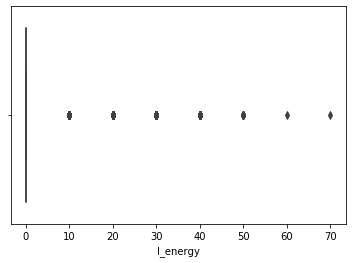

In [10]:
light_box = sns.boxplot(df1.l_energy)

In [11]:
df1['l_energy'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: l_energy, dtype: int64

<b>From the preceding plot and the above output, we see the there are 8 unique values in the <i>l_energy</i> column with 0 as the highest.</b>

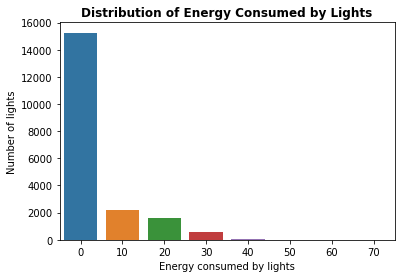

In [12]:
lights = sns.barplot(x=df1['l_energy'].value_counts().index, y=df1['l_energy'].value_counts().values)
lights.set_xlabel('Energy consumed by lights')
lights.set_ylabel('Number of lights')
lights.set_title("Distribution of Energy Consumed by Lights", weight='bold');

In [13]:
((df1.l_energy==0).sum()/df1.shape[0])*100

77.28401317456296

<b>77% of the instances in the l_energy column have 0 Wh. This renders the l_energy column quite
useless because we can't possibly find any links between it and the other data. I'll get rid of this column.</b>

In [14]:
new_df = df1
new_df.drop(columns=['l_energy'], inplace=True)

In [15]:
new_df.head(3)

date_time  a_energy  kitchen_temp  kitchen_hum  liv_temp  \
0  2016-01-11 17:00:00        60         19.89    47.596667      19.2   
1  2016-01-11 17:10:00        60         19.89    46.693333      19.2   
2  2016-01-11 17:20:00        50         19.89    46.300000      19.2   

     liv_hum  laun_temp   laun_hum   off_temp    off_hum  ...   par_temp  \
0  44.790000      19.79  44.730000  19.000000  45.566667  ...  17.033333   
1  44.722500      19.79  44.790000  19.000000  45.992500  ...  17.066667   
2  44.626667      19.79  44.933333  18.926667  45.890000  ...  17.000000   

   par_hum  out_temp  out_press  out_hum      wind  visibility  dew_point  \
0    45.53  6.600000      733.5     92.0  7.000000   63.000000        5.3   
1    45.56  6.483333      733.6     92.0  6.666667   59.166667        5.2   
2    45.50  6.366667      733.7     92.0  6.333333   55.333333        5.1   

         rv1        rv2  
0  13.275433  13.275433  
1  18.606195  18.606195  
2  28.642668  28.642668  

[3 rows x 28 columns]

### Analyzing the Appliances Energy(a_energy) Consumption column

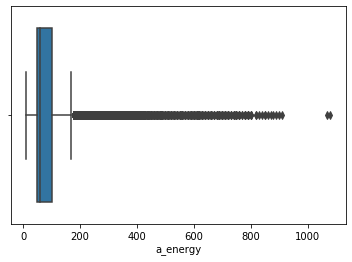

In [16]:
app_box = sns.boxplot(new_df.a_energy)

<b>You can see that a majority of the values seem to lie between 50
Wh and 100 Wh. However, some values extend the upper bracket of 200 Wh
and go beyond 1000 Wh. This seems odd. Check to see how many values extend
above 200 Wh.</b>

In [17]:
(new_df['a_energy']>200).sum()

1916

In [18]:
((new_df['a_energy']>200).sum()/new_df.shape[0])*100

9.708639473017481

In [19]:
(new_df['a_energy']>950).sum()

2

In [20]:
((new_df['a_energy']>950).sum()/new_df.shape[0])*100

0.010134279199391943

<b>Only 0.01% of the instances have a_energy above 950 Wh, so deleting those 2 rows seems okay. However, close to 10% of the instances have a_energy above 200 Wh.</b>

In [21]:
above_200_list = list(new_df.loc[(new_df['a_energy']>200)].index)

In [22]:
energy_df = new_df.drop(labels=above_200_list, axis=0)

In [23]:
energy_df.shape

(17819, 28)

In [24]:
energy_df.describe().T

count        mean        std         min         25%  \
a_energy      17819.0   68.728324  31.378141   10.000000   50.000000   
kitchen_temp  17819.0   21.687676   1.605252   16.790000   20.760000   
kitchen_hum   17819.0   40.158323   3.933742   27.023333   37.260000   
liv_temp      17819.0   20.294921   2.172435   16.100000   18.790000   
liv_hum       17819.0   40.470961   4.062130   20.463333   37.930000   
laun_temp     17819.0   22.230049   1.971209   17.200000   20.790000   
laun_hum      17819.0   39.167393   3.223465   28.766667   36.826667   
off_temp      17819.0   20.858577   2.048053   15.100000   19.566667   
off_hum       17819.0   38.991000   4.324842   27.660000   35.500000   
bath_temp     17819.0   19.607705   1.838655   15.330000   18.290000   
bath_hum      17819.0   50.987044   9.009473   29.815000   45.400000   
out_b_temp    17819.0    7.764725   6.031990   -6.065000    3.500000   
out_b_hum     17819.0   54.917044  30.746291    1.000000   31.145000   
iron_temp     17819.0   20.277619   2.102188   15.390000   18.700000   
iron_hum      17819.0   35.435410   5.085182   23.290000   31.556905   
teen_temp     17819.0   22.046567   1.963094   16.306667   20.823333   
teen_hum      17819.0   43.019409   5.204613   29.600000   39.200000   
par_temp      17819.0   19.502262   2.011673   14.890000   18.066667   
par_hum       17819.0   41.556127   4.164766   29.166667   38.530000   
out_temp      17819.0    7.315671   5.290522   -5.000000    3.533333   
out_press     17819.0  755.559383   7.345043  729.366667  751.000000   
out_hum       17819.0   80.236718  14.771215   24.000000   71.166667   
wind          17819.0    3.975014   2.448213    0.000000    2.000000   
visibility    17819.0   38.306600  11.951954    1.000000   29.000000   
dew_point     17819.0    3.762120   4.186178   -6.600000    0.933333   
rv1           17819.0   25.002765  14.519549    0.005322   12.461009   
rv2           17819.0   25.002765  14.519549    0.005322   12.461009   

                     50%         75%         max  
a_energy       60.000000   80.000000  200.000000  
kitchen_temp   21.600000   22.600000   26.200000  
kitchen_hum    39.560000   42.900000   59.633333  
liv_temp       19.926667   21.472333   29.856667  
liv_hum        40.560000   43.326667   56.026667  
laun_temp      22.100000   23.290000   29.200000  
laun_hum       38.471429   41.590000   49.656667  
off_temp       20.666667   22.100000   26.200000  
off_hum        38.363333   42.090000   51.000000  
bath_temp      19.390000   20.600000   25.795000  
bath_hum       49.090000   53.826667   96.321667  
out_b_temp      7.160000   11.070714   28.290000  
out_b_hum      55.290000   83.060000   99.900000  
iron_temp      20.100000   21.600000   25.890000  
iron_hum       34.900000   39.051865   51.400000  
teen_temp      22.150000   23.390000   27.230000  
teen_hum       42.453889   46.590000   58.780000  
par_temp       19.390000   20.600000   24.500000  
par_hum        40.863333   44.296667   53.326667  
out_temp        6.850000   10.333333   26.100000  
out_press     756.100000  760.933333  772.283333  
out_hum        84.333333   91.845238  100.000000  
wind            3.500000    5.333333   14.000000  
visibility     40.000000   40.000000   66.000000  
dew_point       3.433333    6.550000   15.500000  
rv1            24.940753   37.660263   49.996530  
rv2            24.940753   37.660263   49.996530

### FEATURE ENGINEERING

In [25]:
new_energy = energy_df.copy()
new_energy.head()

date_time  a_energy  kitchen_temp  kitchen_hum  liv_temp  \
0  2016-01-11 17:00:00        60         19.89    47.596667      19.2   
1  2016-01-11 17:10:00        60         19.89    46.693333      19.2   
2  2016-01-11 17:20:00        50         19.89    46.300000      19.2   
3  2016-01-11 17:30:00        50         19.89    46.066667      19.2   
4  2016-01-11 17:40:00        60         19.89    46.333333      19.2   

     liv_hum  laun_temp   laun_hum   off_temp    off_hum  ...   par_temp  \
0  44.790000      19.79  44.730000  19.000000  45.566667  ...  17.033333   
1  44.722500      19.79  44.790000  19.000000  45.992500  ...  17.066667   
2  44.626667      19.79  44.933333  18.926667  45.890000  ...  17.000000   
3  44.590000      19.79  45.000000  18.890000  45.723333  ...  17.000000   
4  44.530000      19.79  45.000000  18.890000  45.530000  ...  17.000000   

   par_hum  out_temp  out_press  out_hum      wind  visibility  dew_point  \
0    45.53  6.600000      733.5     92.0  7.000000   63.000000        5.3   
1    45.56  6.483333      733.6     92.0  6.666667   59.166667        5.2   
2    45.50  6.366667      733.7     92.0  6.333333   55.333333        5.1   
3    45.40  6.250000      733.8     92.0  6.000000   51.500000        5.0   
4    45.40  6.133333      733.9     92.0  5.666667   47.666667        4.9   

         rv1        rv2  
0  13.275433  13.275433  
1  18.606195  18.606195  
2  28.642668  28.642668  
3  45.410389  45.410389  
4  10.084097  10.084097  

[5 rows x 28 columns]

In [26]:
# I'll convert the date_time column of new_en into the DateTime format – %Y-%m-%d %H:%M:%S
new_energy['date_time'] = pd.to_datetime(new_energy.date_time, 
                                         format = '%Y-%m-%d %H:%M:%S')

In [27]:
new_energy.insert(loc = 1, column = 'month', value = new_energy.date_time.dt.month)

In [28]:
new_energy.insert(loc = 2, column = 'day', value = (new_energy.date_time.dt.dayofweek)+1)

In [29]:
new_energy.head(4)

date_time  month  day  a_energy  kitchen_temp  kitchen_hum  \
0 2016-01-11 17:00:00      1    1        60         19.89    47.596667   
1 2016-01-11 17:10:00      1    1        60         19.89    46.693333   
2 2016-01-11 17:20:00      1    1        50         19.89    46.300000   
3 2016-01-11 17:30:00      1    1        50         19.89    46.066667   

   liv_temp    liv_hum  laun_temp   laun_hum  ...   par_temp  par_hum  \
0      19.2  44.790000      19.79  44.730000  ...  17.033333    45.53   
1      19.2  44.722500      19.79  44.790000  ...  17.066667    45.56   
2      19.2  44.626667      19.79  44.933333  ...  17.000000    45.50   
3      19.2  44.590000      19.79  45.000000  ...  17.000000    45.40   

   out_temp  out_press  out_hum      wind  visibility  dew_point        rv1  \
0  6.600000      733.5     92.0  7.000000   63.000000        5.3  13.275433   
1  6.483333      733.6     92.0  6.666667   59.166667        5.2  18.606195   
2  6.366667      733.7     92.0  6.333333   55.333333        5.1  28.642668   
3  6.250000      733.8     92.0  6.000000   51.500000        5.0  45.410389   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  

[4 rows x 30 columns]

#### Visualization

In [30]:
app_date = go.Scatter(x = new_energy.date_time, mode = "lines", y = new_energy.a_energy)
layout = go.Layout(title = 'Appliance Energy Consumed by Date', 
                   xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [app_date], layout = layout)
fig.show()

<b>The data seems quite evenly distributed; however, there is a dip in the energy
consumed toward the end of January and the beginning of April. Let's check it out.</b>

In [31]:
app_mon = new_energy.groupby(by = ['month'], as_index = False)['a_energy'].sum()
app_mon

month  a_energy
0      1    150060
1      2    258270
2      3    283190
3      4    274030
4      5    259120

In [32]:
app_mon.sort_values(by = 'a_energy', ascending = False)

month  a_energy
2      3    283190
3      4    274030
4      5    259120
1      2    258270
0      1    150060

<b>As you can see, March was the month during which the appliances consumed
the most energy, and it was in January that they consumed the least. The
difference between the energy consumed in January and February (the
month during which the second least amount of energy was consumed) is
approximately 100,000 Wh itself.</b>

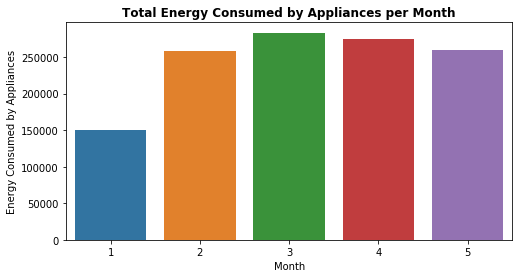

In [37]:
plt.subplots(figsize=(8,4))
am = sns.barplot(app_mon.month, app_mon.a_energy)
plt.xlabel('Month')
plt.ylabel('Energy Consumed by Appliances')
plt.title('Total Energy Consumed by Appliances per Month', weight='bold');

#### OBSERVING APPLIANCES ENERGY AND DAY

In [38]:
app_day =  new_energy.groupby(by = ['day'], as_index = False)['a_energy'].sum()
app_day

day  a_energy
0    1    161190
1    2    175930
2    3    191700
3    4    177830
4    5    161170
5    6    173640
6    7    183210

In [39]:
app_day.sort_values(by = 'a_energy', ascending = False)

day  a_energy
2    3    191700
6    7    183210
3    4    177830
1    2    175930
5    6    173640
0    1    161190
4    5    161170

<b>The perceding output indicates that Wednesdays were the days when the appliances
consumed the most energy, which is a bit odd. The following day in the table is
Sunday, which makes sense since people might be at home more. The day the
least energy was consumed was Friday.</b>

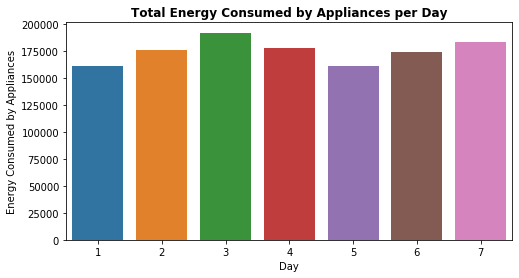

In [42]:
plt.subplots(figsize=(8,4))
am = sns.barplot(app_day.day, app_day.a_energy)
plt.xlabel('Day')
plt.ylabel('Energy Consumed by Appliances')
plt.title('Total Energy Consumed by Appliances per Day', weight='bold');

#### PLOTTING DISTRIBUTIONS OF THE TEMPERATURE COLUMNS

In [78]:
col_temp = ['kitchen_temp', 'liv_temp', 'laun_temp', 
            'off_temp', 'bath_temp', 'out_b_temp', 
            'iron_temp', 'teen_temp', 'par_temp']

In [79]:
temp_df = new_energy[col_temp]
temp_df.head(3)

kitchen_temp  liv_temp  laun_temp   off_temp  bath_temp  out_b_temp  \
0         19.89      19.2      19.79  19.000000  17.166667    7.026667   
1         19.89      19.2      19.79  19.000000  17.166667    6.833333   
2         19.89      19.2      19.79  18.926667  17.166667    6.560000   

   iron_temp  teen_temp   par_temp  
0       17.2       18.2  17.033333  
1       17.2       18.2  17.066667  
2       17.2       18.2  17.000000

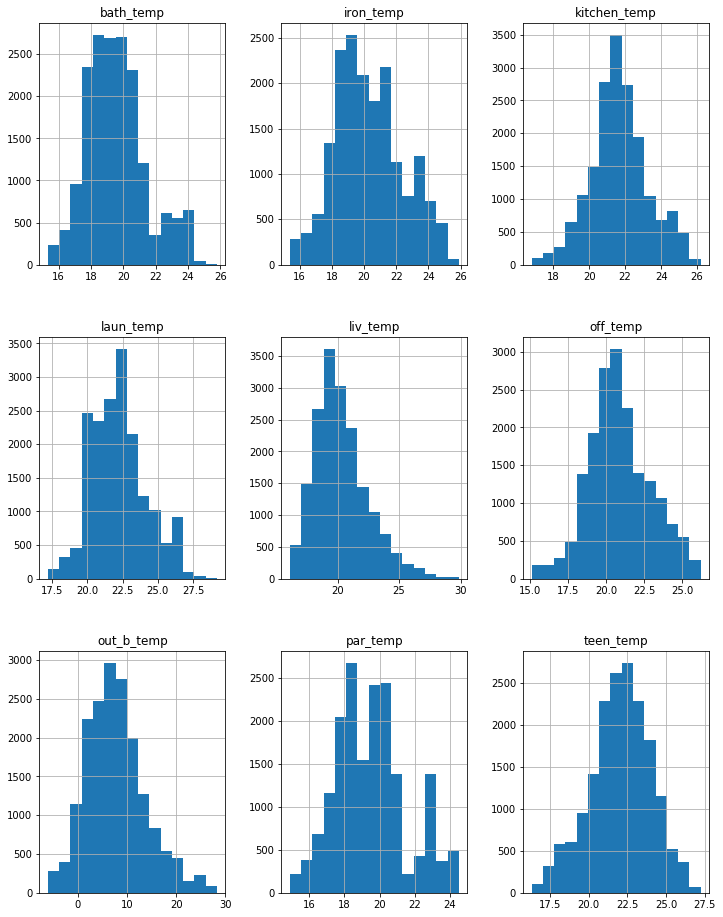

In [80]:
temp_df.hist(bins = 15, figsize = (12, 16));

<b>All of these distributions seem to be following the normal distribution as they are
spread across the scale with a few gradual surges in between. As you can see, there
are no sudden rises or falls through the distribution and so we can conclude that the
temperature data is not skewed.</b>

#### PLOTTING DISTRIBUTIONS OF THE PRESSURE COLUMNS

In [71]:
c_ser = pd.Series(new_energy.columns)

In [73]:
hum_ser = pd.Series(c)
col_hum = list(hum_ser[hum_ser.str.contains('hum')])

In [76]:
hum_df = new_energy[col_hum].drop(columns=['out_hum'], axis=1)
hum_df.head(3)

kitchen_hum    liv_hum   laun_hum    off_hum  bath_hum  out_b_hum  \
0    47.596667  44.790000  44.730000  45.566667     55.20  84.256667   
1    46.693333  44.722500  44.790000  45.992500     55.20  84.063333   
2    46.300000  44.626667  44.933333  45.890000     55.09  83.156667   

    iron_hum   teen_hum  par_hum  
0  41.626667  48.900000    45.53  
1  41.560000  48.863333    45.56  
2  41.433333  48.730000    45.50

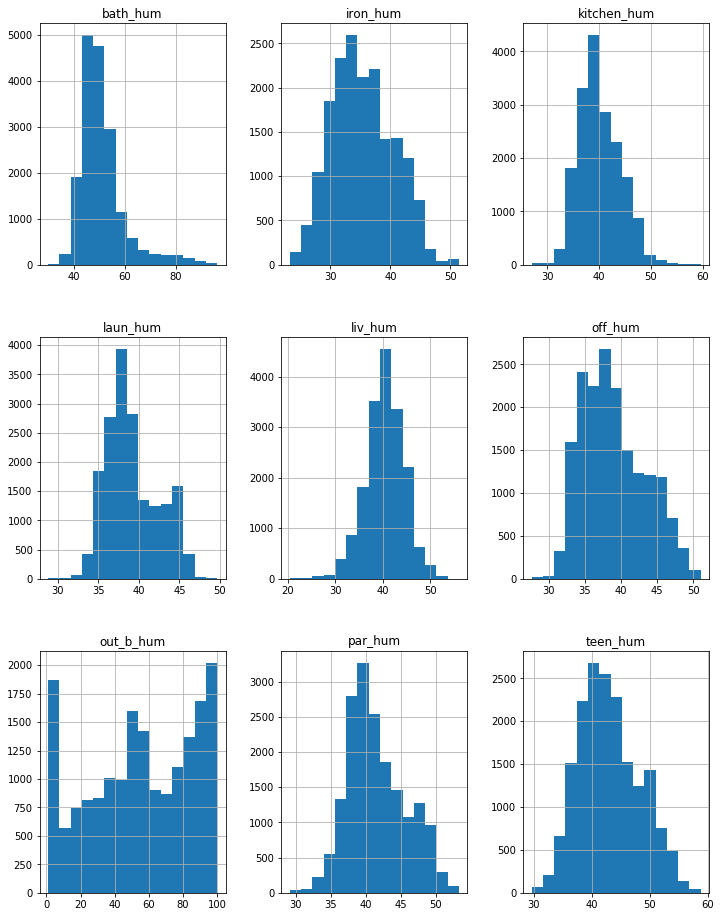

In [77]:
hum_df.hist(bins = 15, figsize = (12, 16));

<b>All the distributions except out_b_hum appear to be following the normal
distribution. As you can see, the distribution of out_b_hum rises steeply at the
extremes of the scale and the rest of the data points are spread unevenly across
the x axis.</b>

#### PLOTTING DISTRIBUTIONS OF THE WEATHER COLUMNS

In [81]:
col_weather = ['out_temp', 'dew_point', 'out_hum', 'out_press', 'wind', 'visibility']
weather_df = new_energy[col_weather]
weather_df.head()

out_temp  dew_point  out_hum  out_press      wind  visibility
0  6.600000        5.3     92.0      733.5  7.000000   63.000000
1  6.483333        5.2     92.0      733.6  6.666667   59.166667
2  6.366667        5.1     92.0      733.7  6.333333   55.333333
3  6.250000        5.0     92.0      733.8  6.000000   51.500000
4  6.133333        4.9     92.0      733.9  5.666667   47.666667

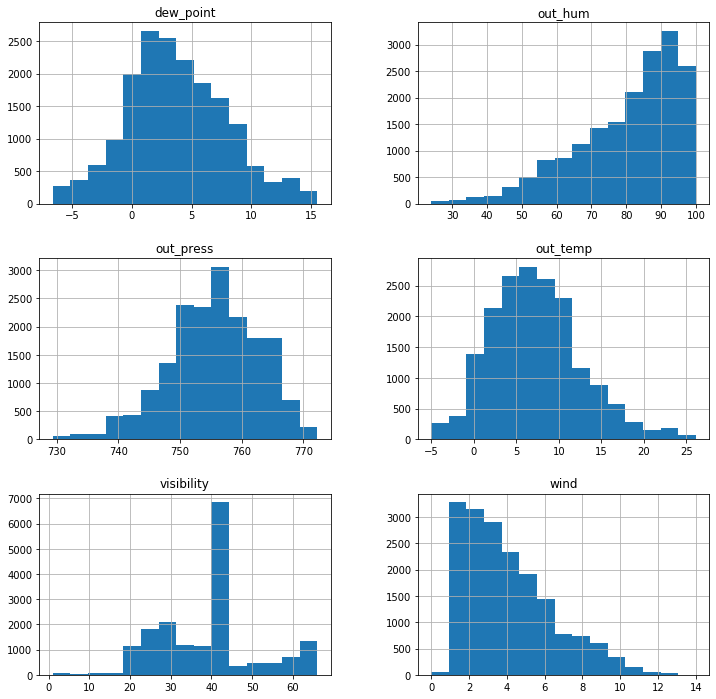

In [83]:
weather_df.hist(bins = 15, figsize = (12, 12));

<b>As you can see, three of these distributions are not normal: out_hum,
visibility, and wind, as they appear to show steep rises/falls through the
plot. We need to find out the reason for this.</b>

### Plotting out_b, out_hum, visibility, and wind

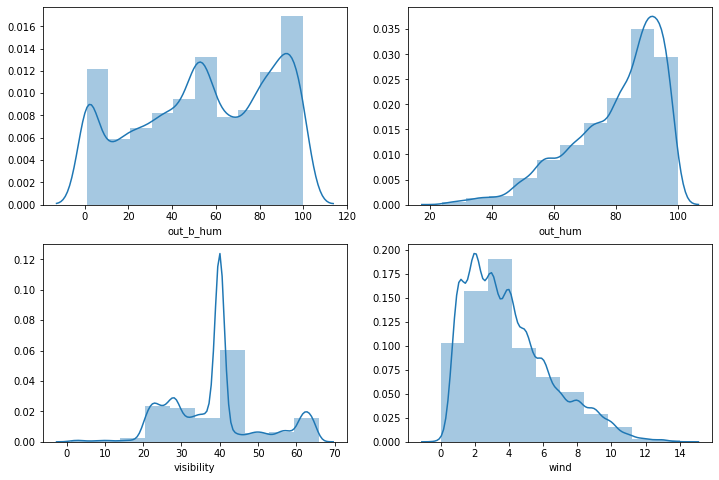

In [84]:
f, ax = plt.subplots(2, 2, figsize = (12, 8))
obh = sns.distplot(hum_df["out_b_hum"], bins = 10, ax = ax[0][0])
oh = sns.distplot(weather_df["out_hum"], bins = 10, ax = ax[0][1])
vis = sns.distplot(weather_df["visibility"], bins = 10, ax = ax[1][0])
wind = sns.distplot(weather_df["wind"], bins = 10, ax = ax[1][1])

In [85]:
new_energy.corr()

month       day  a_energy  kitchen_temp  kitchen_hum  \
month         1.000000 -0.016191  0.115125      0.708987    -0.106125   
day          -0.016191  1.000000  0.046149     -0.005030    -0.065452   
a_energy      0.115125  0.046149  1.000000      0.222789     0.057062   
kitchen_temp  0.708987 -0.005030  0.222789      1.000000     0.153276   
kitchen_hum  -0.106125 -0.065452  0.057062      0.153276     1.000000   
liv_temp      0.529894 -0.009717  0.246631      0.832574     0.256966   
liv_hum      -0.100761 -0.052663 -0.100068     -0.001788     0.805630   
laun_temp     0.799444 -0.023599  0.168179      0.896807     0.243160   
laun_hum     -0.417525 -0.040370 -0.070810     -0.032696     0.853841   
off_temp      0.794599 -0.108712  0.175203      0.880310     0.095862   
off_hum      -0.270533 -0.013330 -0.026794      0.082450     0.888905   
bath_temp     0.786800 -0.053979  0.166719      0.886425     0.196119   
bath_hum     -0.227631 -0.002937  0.065867     -0.007609     0.305407   
out_b_temp    0.590502  0.018428  0.213271      0.642941     0.312131   
out_b_hum    -0.812664  0.011244 -0.217067     -0.612895     0.263262   
iron_temp     0.835467 -0.029212  0.153796      0.841692     0.019384   
iron_hum     -0.177165 -0.006247 -0.116821      0.125106     0.810108   
teen_temp     0.788262  0.022484  0.234231      0.832059    -0.038402   
teen_hum     -0.288548  0.007751 -0.200369     -0.018868     0.741523   
par_temp      0.889534 -0.033382  0.134592      0.847428     0.109708   
par_hum      -0.236639  0.006655 -0.179340      0.059597     0.769947   
out_temp      0.583420  0.022970  0.201174      0.671504     0.338990   
out_press    -0.059009 -0.030739 -0.086890     -0.152250    -0.287800   
out_hum      -0.329678  0.004130 -0.241227     -0.334571     0.283508   
wind         -0.270415  0.046082  0.059336     -0.106147     0.204454   
visibility   -0.093734 -0.047817 -0.023696     -0.070878    -0.022641   
dew_point     0.463486  0.024264  0.075059      0.564947     0.641620   
rv1          -0.001082  0.003601 -0.009520     -0.003582    -0.002244   
rv2          -0.001082  0.003601 -0.009520     -0.003582    -0.002244   

              liv_temp   liv_hum  laun_temp  laun_hum  off_temp  ...  \
month         0.529894 -0.100761   0.799444 -0.417525  0.794599  ...   
day          -0.009717 -0.052663  -0.023599 -0.040370 -0.108712  ...   
a_energy      0.246631 -0.100068   0.168179 -0.070810  0.175203  ...   
kitchen_temp  0.832574 -0.001788   0.896807 -0.032696  0.880310  ...   
kitchen_hum   0.256966  0.805630   0.243160  0.853841  0.095862  ...   
liv_temp      1.000000 -0.170334   0.725759  0.114513  0.758196  ...   
liv_hum      -0.170334  1.000000   0.149026  0.688632 -0.045690  ...   
laun_temp     0.725759  0.149026   1.000000 -0.018611  0.861197  ...   
laun_hum      0.114513  0.688632  -0.018611  1.000000 -0.148618  ...   
off_temp      0.758196 -0.045690   0.861197 -0.148618  1.000000  ...   
off_hum       0.218868  0.726219   0.113511  0.909296 -0.061961  ...   
bath_temp     0.713861  0.109408   0.898709 -0.053775  0.876100  ...   
bath_hum      0.034130  0.243451  -0.061489  0.374729 -0.073070  ...   
out_b_temp    0.797776 -0.009433   0.669356  0.081026  0.644015  ...   
out_b_hum    -0.577933  0.396627  -0.638275  0.526115 -0.705118  ...   
iron_temp     0.659617 -0.043039   0.855000 -0.245383  0.881392  ...   
iron_hum      0.219000  0.693278   0.174292  0.844584  0.034243  ...   
teen_temp     0.577365 -0.040139   0.806197 -0.279628  0.801316  ...   
teen_hum      0.053026  0.680788   0.043716  0.839904 -0.109831  ...   
par_temp      0.670761  0.058399   0.911458 -0.192119  0.891731  ...   
par_hum       0.143837  0.680281   0.129942  0.844789 -0.039033  ...   
out_temp      0.788005  0.036581   0.685467  0.125097  0.655161  ...   
out_press    -0.133151 -0.250262  -0.192572 -0.236442 -0.076071  ...   
out_hum      -0.508144  0.589211  -0.254263  0.358371 -0.379676  ...   
wind          0.044434  0.

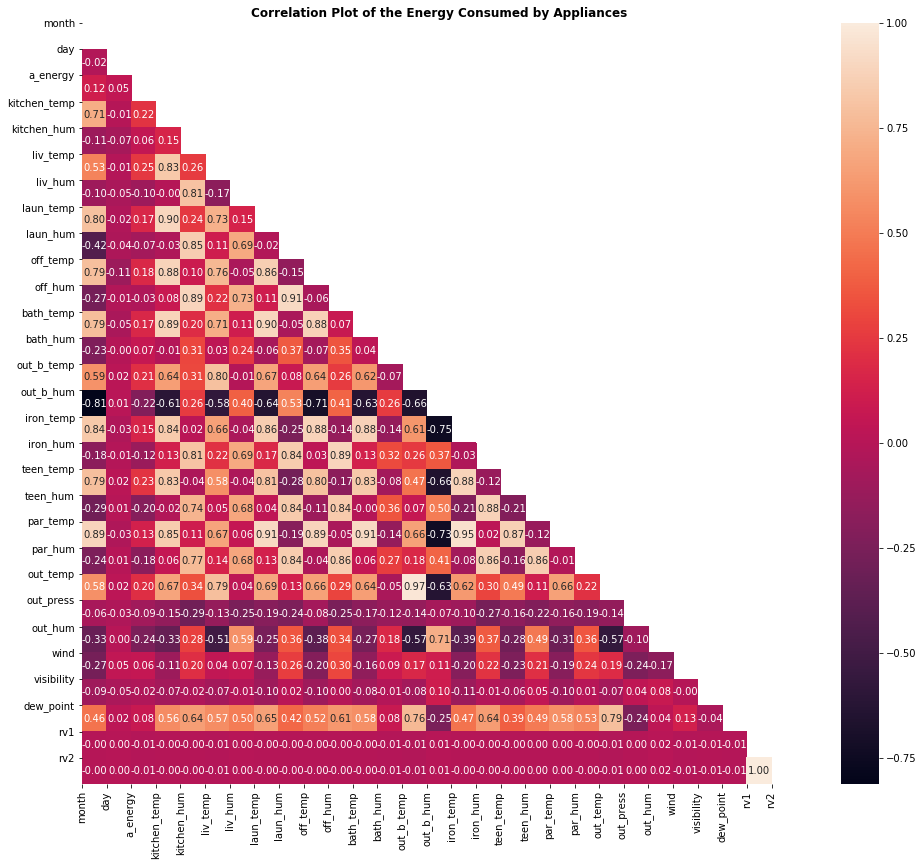

In [87]:
corr = new_energy.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, annot = True, fmt = ".2f", mask = mask)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Plot of the Energy Consumed by Appliances", weight='bold')
plt.show()